In [1]:
import pandas as pd

In [15]:
df=pd.read_csv("./Advertising.csv",index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [16]:
df.drop(columns=['radio','newspaper'],inplace=True)
df.head()

,TV,sales
1,230.1,22.1
2,44.5,10.4
3,17.2,9.3
4,151.5,18.5
5,180.8,12.9


In [17]:
df.shape

(200, 2)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   sales   200 non-null    float64
dtypes: float64(2)
memory usage: 4.7 KB


In [19]:
df.to_excel('Advertising.xlsx',index=False)

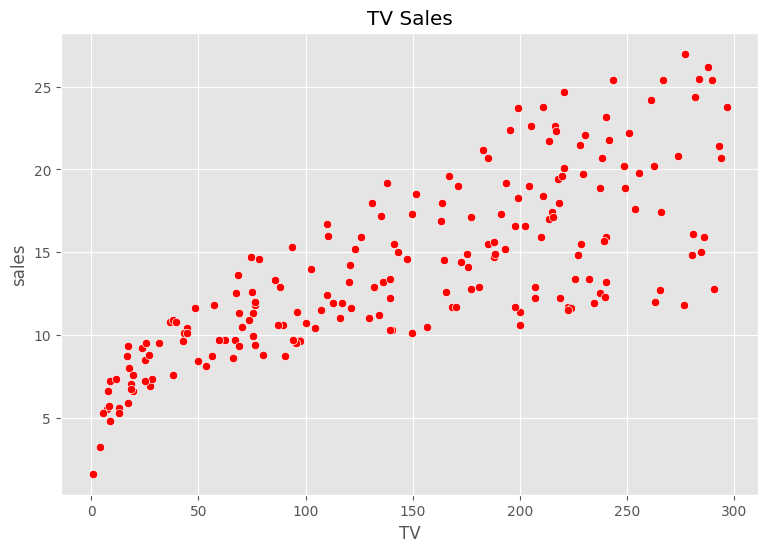

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

fig, ax =plt.subplots(figsize=(9,6))
sns.scatterplot(x='TV',y='sales',data=df,ax=ax,color='red')
ax.set_title('TV Sales')
plt.show()

In [25]:
df.corr(method='pearson')

,TV,sales
TV,1.000000,0.782224
sales,0.782224,1.000000


In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [28]:
import numpy as np

In [30]:
m=df['sales'].values.size

X= np.append(np.ones((m,1)),df['TV'].values.reshape(m,1),axis=1)

y=df['sales'].values.reshape(m,1)

theta=np.zeros((2,1))

In [31]:
def cost_function(X,y,theta):
  y_pred=np.dot(X,theta)
  sqrd_error=(y_pred-y)**2
  cost=1/(2*m)*np.sum(sqrd_error)
  return cost

In [33]:
cost_function(X,y,theta)

np.float64(111.858125)

In [34]:
def gradient_descent(X,y,theta,alpha,iterations):
  costs=[]
  for i in range(iterations):
    y_pred=np.dot(X,theta)
    der=np.dot(X.transpose(),(y_pred-y))/m
    theta -= alpha*der
    costs.append(cost_function(X,y,theta))

  return theta,costs

In [35]:
theta , costs = gradient_descent(X,y,theta,alpha=0.000068,iterations=400000)

In [36]:
theta

array([[7.02543044],
       [0.04757302]])

In [39]:
costs[-1]

np.float64(5.256332955936212)

In [40]:
np.round(theta,3)

array([[7.025],
       [0.048]])

In [41]:
y_pred=np.dot(X,np.round(theta,3))
dic= {'sales(Actual)':y.flatten(),
      'sales(Predicted)':np.round(y_pred,1).flatten()}

df1=pd.DataFrame(dic)
df1.head()

,sales(Actual),sales(Predicted)
0,22.1,18.1
1,10.4,9.2
2,9.3,7.9
3,18.5,14.3
4,12.9,15.7


In [42]:
def predict(a):
  x=np.array([1,a]).reshape(1,2)
  y_pred=np.dot(x,theta)
  return y_pred[0,0]

In [43]:
predict(30)

np.float64(8.452620937358214)

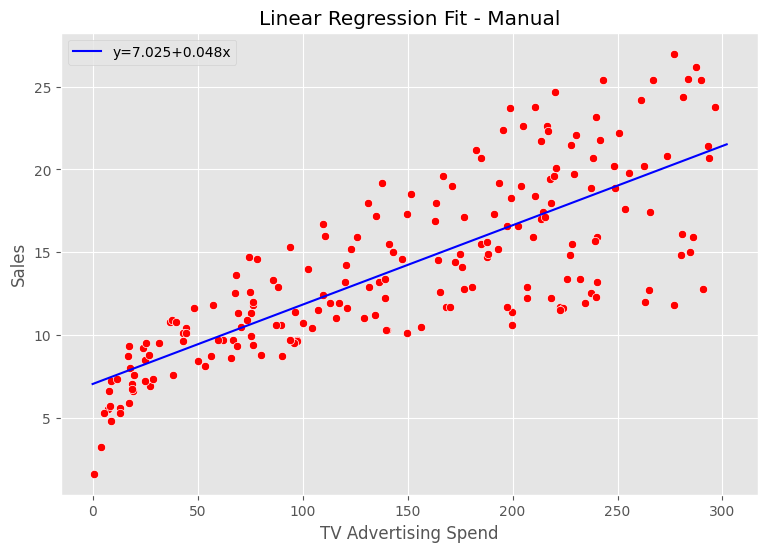

In [45]:


plt.style.use("ggplot")

fig, ax = plt.subplots(figsize=(9, 6))

# Scatter plot
sns.scatterplot(x='TV', y='sales', data=df, ax=ax, color='red')

# Assuming theta is a 2x1 numpy array like [[intercept], [slope]]
a = np.round(theta, 3)

# Create a range of x values (TV ad spend)
x_value = np.array(range(0, 303))  # or use np.linspace(min, max, N) for smoother line

# Compute predicted y values using the linear model y = a0 + a1*x
y_value = a[0, 0] + (a[1, 0] * x_value)

# Plot regression line
sns.lineplot(x=x_value, y=y_value, ax=ax, label=f'y={a[0,0]}+{a[1,0]}x', color='blue')

# Titles and labels
ax.set_title('Linear Regression Fit - Manual')
ax.set_xlabel('TV Advertising Spend')
ax.set_ylabel('Sales')

plt.show()
